In [303]:
import pandas as pd
import numpy as np
import scipy.stats as sps
import matplotlib.pyplot as plt
import seaborn as sns
import random
from sklearn.impute import KNNImputer
from sklearn.cluster import DBSCAN
import datetime

In [127]:
df = pd.read_csv(r"C:\Users\teren\Downloads\Coffee_Chain_Sales .csv")

In [129]:
# test
df.head(3)

,Area Code,Cogs,DifferenceBetweenActualandTargetProfit,Date,Inventory Margin,Margin,Market_size,Market,Marketing,Product_line,...,Product,Profit,Sales,State,Target_cogs,Target_margin,Target_profit,Target_sales,Total_expenses,Type
0,303,51,-35,10/1/2012,503,71,Major Market,Central,46,Leaves,...,Lemon,-5,122,Colorado,30,60,30,90,76,Decaf
1,970,52,-24,10/1/2012,405,71,Major Market,Central,17,Leaves,...,Mint,26,123,Colorado,30,60,50,90,45,Decaf
2,409,43,-22,10/2/2012,419,64,Major Market,South,13,Leaves,...,Lemon,28,107,Texas,30,60,50,90,36,Decaf


In [131]:
# types of columns
df.dtypes

Area Code                                  int64
Cogs                                       int64
DifferenceBetweenActualandTargetProfit     int64
Date                                      object
Inventory Margin                           int64
Margin                                     int64
Market_size                               object
Market                                    object
Marketing                                  int64
Product_line                              object
Product_type                              object
Product                                   object
Profit                                     int64
Sales                                      int64
State                                     object
Target_cogs                                int64
Target_margin                              int64
Target_profit                              int64
Target_sales                               int64
Total_expenses                             int64
Type                

In [133]:
# size of data set
df.shape

(1062, 21)

In [141]:
# convert Date (oblect) to datetime format
df['Date_date'] = pd.to_datetime(df['Date'], errors='coerce')

In [159]:
# convert Area Code to object format
df['Area'] = df['Area Code'].astype('object')

In [179]:
df.head(3)

,Area Code,Cogs,DifferenceBetweenActualandTargetProfit,Date,Inventory Margin,Margin,Market_size,Market,Marketing,Product_line,...,Sales,State,Target_cogs,Target_margin,Target_profit,Target_sales,Total_expenses,Type,Date_date,Area
0,303,51,-35,10/1/2012,503,71,Major Market,Central,46,Leaves,...,122,Colorado,30,60,30,90,76,Decaf,2012-10-01,303
1,970,52,-24,10/1/2012,405,71,Major Market,Central,17,Leaves,...,123,Colorado,30,60,50,90,45,Decaf,2012-10-01,970
2,409,43,-22,10/2/2012,419,64,Major Market,South,13,Leaves,...,107,Texas,30,60,50,90,36,Decaf,2012-10-02,409


In [181]:
# delete Area code
df1 = df.drop(['Area Code','Date'], axis = 1)

In [183]:
df1.head(2)

,Cogs,DifferenceBetweenActualandTargetProfit,Inventory Margin,Margin,Market_size,Market,Marketing,Product_line,Product_type,Product,...,Sales,State,Target_cogs,Target_margin,Target_profit,Target_sales,Total_expenses,Type,Date_date,Area
0,51,-35,503,71,Major Market,Central,46,Leaves,Herbal Tea,Lemon,...,122,Colorado,30,60,30,90,76,Decaf,2012-10-01,303
1,52,-24,405,71,Major Market,Central,17,Leaves,Herbal Tea,Mint,...,123,Colorado,30,60,50,90,45,Decaf,2012-10-01,970


In [169]:
df.dtypes

Area Code                                          int64
Cogs                                               int64
DifferenceBetweenActualandTargetProfit             int64
Date                                              object
Inventory Margin                                   int64
Margin                                             int64
Market_size                                       object
Market                                            object
Marketing                                          int64
Product_line                                      object
Product_type                                      object
Product                                           object
Profit                                             int64
Sales                                              int64
State                                             object
Target_cogs                                        int64
Target_margin                                      int64
Target_profit                  

In [163]:
df.head(5)

,Area Code,Cogs,DifferenceBetweenActualandTargetProfit,Date,Inventory Margin,Margin,Market_size,Market,Marketing,Product_line,...,Sales,State,Target_cogs,Target_margin,Target_profit,Target_sales,Total_expenses,Type,Date_date,Area
0,303,51,-35,10/1/2012,503,71,Major Market,Central,46,Leaves,...,122,Colorado,30,60,30,90,76,Decaf,2012-10-01,303
1,970,52,-24,10/1/2012,405,71,Major Market,Central,17,Leaves,...,123,Colorado,30,60,50,90,45,Decaf,2012-10-01,970
2,409,43,-22,10/2/2012,419,64,Major Market,South,13,Leaves,...,107,Texas,30,60,50,90,36,Decaf,2012-10-02,409
3,850,38,-15,10/3/2012,871,56,Major Market,East,10,Leaves,...,94,Florida,40,60,50,100,21,Regular,2012-10-03,850
4,562,72,6,10/4/2012,650,110,Major Market,West,23,Leaves,...,182,California,20,60,50,80,54,Regular,2012-10-04,562


In [171]:
# delete columns Date
df.drop(['Date'], axis = 1)

,Area Code,Cogs,DifferenceBetweenActualandTargetProfit,Inventory Margin,Margin,Market_size,Market,Marketing,Product_line,Product_type,...,Sales,State,Target_cogs,Target_margin,Target_profit,Target_sales,Total_expenses,Type,Date_date,Area
0,303,51,-35,503,71,Major Market,Central,46,Leaves,Herbal Tea,...,122,Colorado,30,60,30,90,76,Decaf,2012-10-01,303
1,970,52,-24,405,71,Major Market,Central,17,Leaves,Herbal Tea,...,123,Colorado,30,60,50,90,45,Decaf,2012-10-01,970
2,409,43,-22,419,64,Major Market,South,13,Leaves,Herbal Tea,...,107,Texas,30,60,50,90,36,Decaf,2012-10-02,409
3,850,38,-15,871,56,Major Market,East,10,Leaves,Tea,...,94,Florida,40,60,50,100,21,Regular,2012-10-03,850
4,562,72,6,650,110,Major Market,West,23,Leaves,Tea,...,182,California,20,60,50,80,54,Regular,2012-10-04,562
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1057,775,250,133,1820,251,Small Market,West,70,Leaves,Tea,...,534,Nevada,180,180,100,360,94,Regular,2015-08-23,775
1058,971,88,48,817,133,Small Market,West,29,Leaves,Tea,...,236,Oregon,60,100,60,160,60,Regular,2015-08-24,971
1059,775,294,-285,8252,-294,Small Market,West,111,Leaves,Tea,...,33,Nevada,210,-210,-320,0,145,Regular,2015-08-25,775
1060,503,134,80,690,186,Small Market,West,41,Leaves,Tea,...,341,Oregon,90,140,100,230,65,Regular,2015-08-26,503


In [175]:
# describe of numeric columns
df.describe()

,Area Code,Cogs,DifferenceBetweenActualandTargetProfit,Inventory Margin,Margin,Marketing,Profit,Sales,Target_cogs,Target_margin,Target_profit,Target_sales,Total_expenses,Date_date
count,1062.000000,1062.000000,1062.000000,1062.000000,1062.000000,1062.000000,1062.000000,1062.000000,1062.000000,1062.000000,1062.000000,1062.000000,1062.000000,1062
mean,587.030132,82.399247,0.387006,815.175141,102.423729,30.433145,60.556497,191.049906,71.676083,96.817326,60.169492,168.493409,53.836158,2014-03-14 12:01:21.355932416
min,203.000000,0.000000,-369.000000,-3534.000000,-294.000000,0.000000,-605.000000,21.000000,0.000000,-210.000000,-320.000000,0.000000,11.000000,2012-10-01 00:00:00
25%,425.000000,41.000000,-15.000000,447.000000,51.000000,13.000000,16.250000,98.000000,30.000000,50.000000,20.000000,80.000000,33.000000,2013-06-22 06:00:00
50%,573.000000,57.000000,-3.000000,659.000000,73.000000,22.000000,39.500000,133.000000,50.000000,70.000000,40.000000,120.000000,46.000000,2014-03-14 12:00:00
75%,774.000000,101.000000,13.000000,968.000000,130.000000,40.750000,87.000000,227.000000,90.000000,120.000000,80.000000,210.000000,66.000000,2014-12-04 18:00:00
max,985.000000,294.000000,249.000000,8252.000000,526.000000,122.000000,646.000000,815.000000,380.000000,580.000000,470.000000,960.000000,156.000000,2015-08-27 00:00:00
std,225.299162,64.824295,44.331180,916.156386,91.286704,25.963448,100.516593,148.270317,65.701583,89.467176,77.824869,145.955171,31.703526,NaN


In [177]:
df.head(5)

,Area Code,Cogs,DifferenceBetweenActualandTargetProfit,Date,Inventory Margin,Margin,Market_size,Market,Marketing,Product_line,...,Sales,State,Target_cogs,Target_margin,Target_profit,Target_sales,Total_expenses,Type,Date_date,Area
0,303,51,-35,10/1/2012,503,71,Major Market,Central,46,Leaves,...,122,Colorado,30,60,30,90,76,Decaf,2012-10-01,303
1,970,52,-24,10/1/2012,405,71,Major Market,Central,17,Leaves,...,123,Colorado,30,60,50,90,45,Decaf,2012-10-01,970
2,409,43,-22,10/2/2012,419,64,Major Market,South,13,Leaves,...,107,Texas,30,60,50,90,36,Decaf,2012-10-02,409
3,850,38,-15,10/3/2012,871,56,Major Market,East,10,Leaves,...,94,Florida,40,60,50,100,21,Regular,2012-10-03,850
4,562,72,6,10/4/2012,650,110,Major Market,West,23,Leaves,...,182,California,20,60,50,80,54,Regular,2012-10-04,562


In [119]:
df[df.duplicated()]

,Area Code,Cogs,DifferenceBetweenActualandTargetProfit,Date,Inventory Margin,Margin,Market_size,Market,Marketing,Product_line,...,Profit,Sales,State,Target_cogs,Target_margin,Target_profit,Target_sales,Total_expenses,Type,Date_date


In [153]:
df.isnull().sum()

Area Code                                 0
Cogs                                      0
DifferenceBetweenActualandTargetProfit    0
Date                                      0
Inventory Margin                          0
Margin                                    0
Market_size                               0
Market                                    0
Marketing                                 0
Product_line                              0
Product_type                              0
Product                                   0
Profit                                    0
Sales                                     0
State                                     0
Target_cogs                               0
Target_margin                             0
Target_profit                             0
Target_sales                              0
Total_expenses                            0
Type                                      0
Date_date                                 0
dtype: int64

<Axes: >

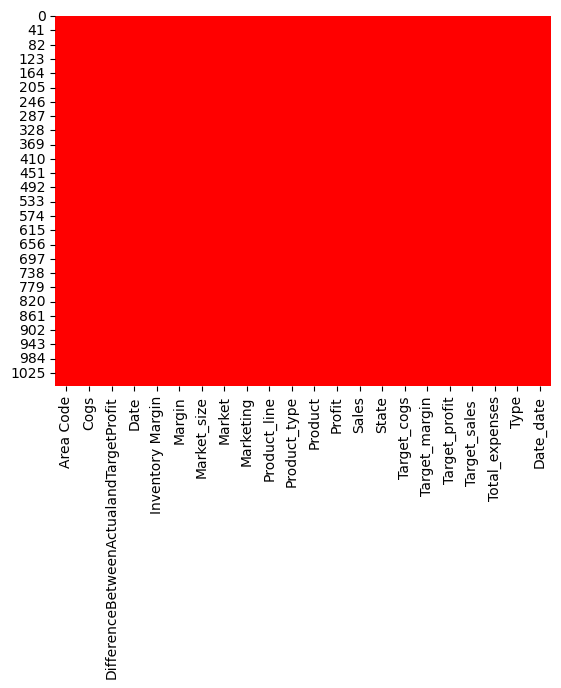

In [155]:
colors = ['red','yellow']
sns.heatmap(df.isnull(), cmap=sns.color_palette(colors), cbar=False)

In [157]:
df.select_dtypes('int').head(3)

,Area Code,Cogs,DifferenceBetweenActualandTargetProfit,Inventory Margin,Margin,Marketing,Profit,Sales,Target_cogs,Target_margin,Target_profit,Target_sales,Total_expenses
0,303,51,-35,503,71,46,-5,122,30,60,30,90,76
1,970,52,-24,405,71,17,26,123,30,60,50,90,45
2,409,43,-22,419,64,13,28,107,30,60,50,90,36


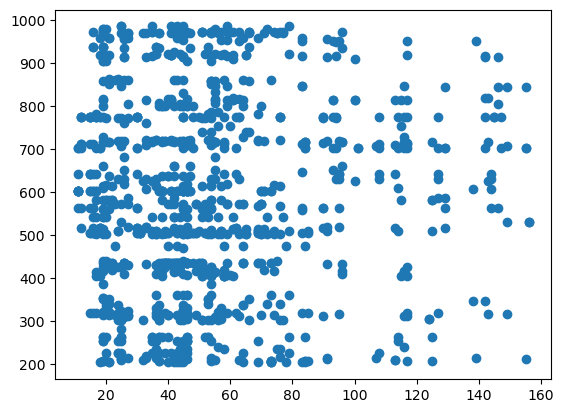

In [41]:
x = df['Total_expenses']
y = df['Area Code']
plt.scatter(x,y)

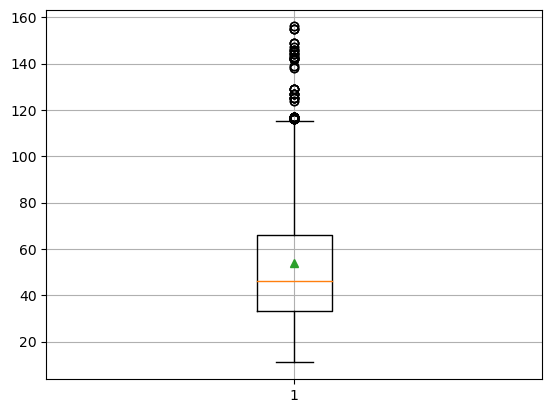

In [459]:
plt.boxplot(x, showmeans = True, vert = True)
plt.grid()

156 max, 11 min, 53.836158192090394 average, 46.0 median


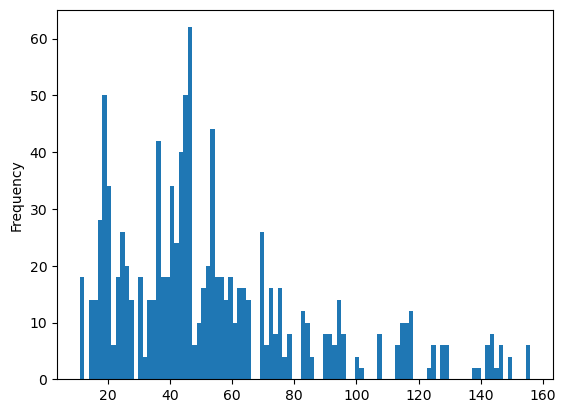

In [61]:
x.plot(kind = 'hist', bins = 100)
print(f'{x.max()} max, {x.min()} min, {x.mean()} average, {x.median()} median')

In [75]:
# create data set for int values and analise using boxplot (outlets)
# df_std - standart deviation set
# create empty df
df_std = pd.DataFrame()
# df_num - numeric columns data set
df_num = df.select_dtypes(include='int')
for column in df_num.columns:
    m = df_num[column].mean()
    s = df_num[column].std()
    df_std[column + '_std'] = (df_num[column] - m) / s

In [77]:
df_std.head(3)

,Area Code_std,Cogs_std,DifferenceBetweenActualandTargetProfit_std,Inventory Margin_std,Margin_std,Marketing_std,Profit_std,Sales_std,Target_cogs_std,Target_margin_std,Target_profit_std,Target_sales _std,Total_expenses_std
0,-1.260680,-0.484375,-0.798242,-0.340744,-0.344231,0.599568,-0.652196,-0.465703,-0.634324,-0.411518,-0.387659,-0.537791,0.699097
1,1.699828,-0.468948,-0.550110,-0.447713,-0.344231,-0.517387,-0.343789,-0.458958,-0.634324,-0.411518,-0.130671,-0.537791,-0.278712
2,-0.790194,-0.607785,-0.504995,-0.432432,-0.420913,-0.671450,-0.323892,-0.566869,-0.634324,-0.411518,-0.130671,-0.537791,-0.562592


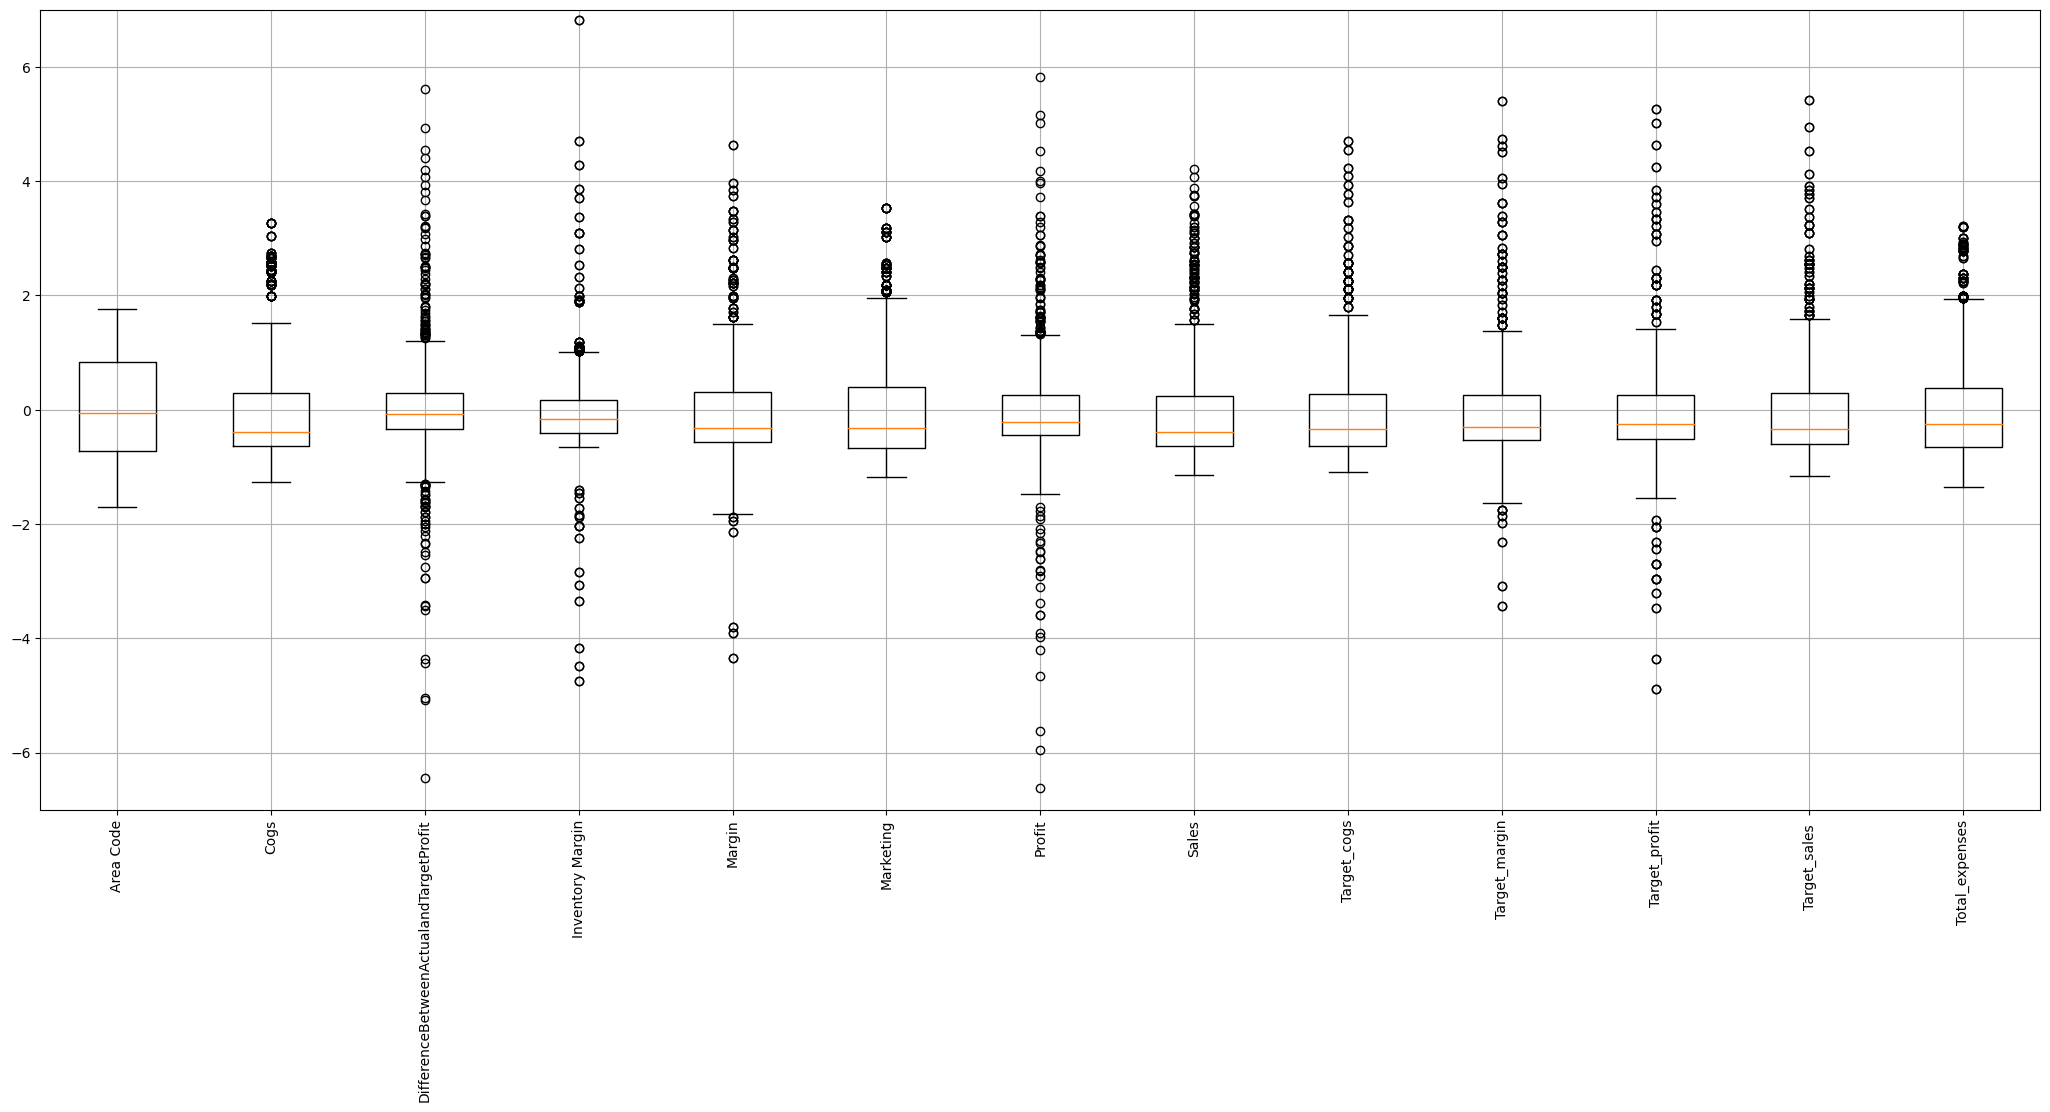

In [107]:
# make boxplot for all numeric columns
fig = plt.figure(figsize = (20,8))
ax = fig.add_axes([0,0,1,1])
data = []
for column in df_std.columns:
    data.append(df_std[column])
labels = df_num.columns
box_plot = ax.boxplot(data,  widths =0.5)
ax.set_xticklabels(labels)
plt.xticks(rotation = 90)
plt.ylim(-7,7)
plt.grid()
plt.show()

In [109]:
labels = df_num.columns.to_list()
labels

['Area Code',
 'Cogs',
 'DifferenceBetweenActualandTargetProfit',
 'Inventory Margin',
 'Margin',
 'Marketing',
 'Profit',
 'Sales',
 'Target_cogs',
 'Target_margin',
 'Target_profit',
 'Target_sales ',
 'Total_expenses']

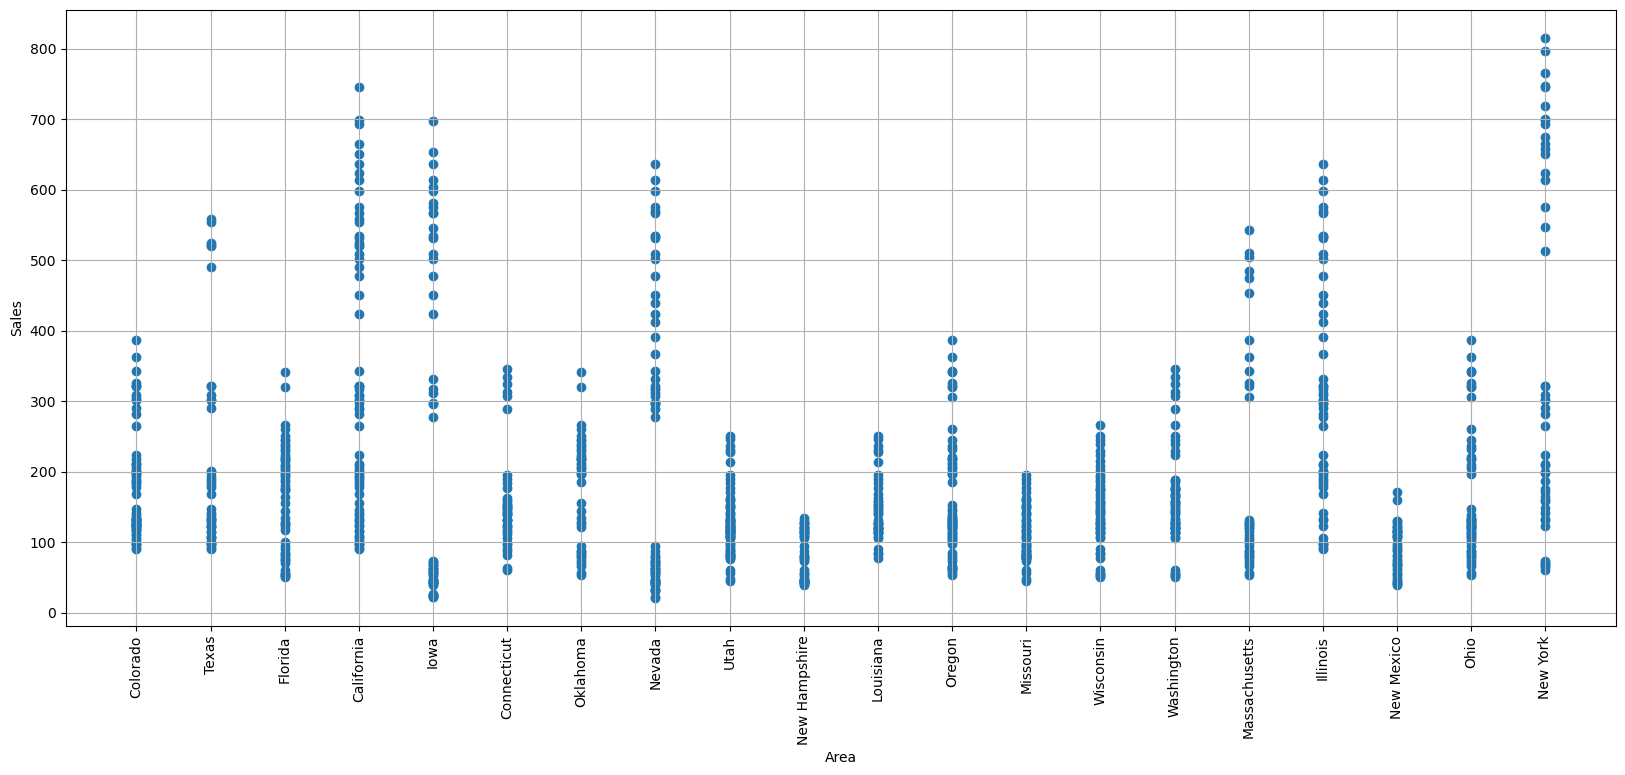

In [193]:
# standartization of values
fig = plt.figure(figsize = (20,8))
X = df1['State']
Y = df1['Sales']
plt.scatter(X,Y)
plt.xlabel('Area')
plt.ylabel('Sales')
plt.xticks(rotation = 90)
plt.grid()
plt.show()

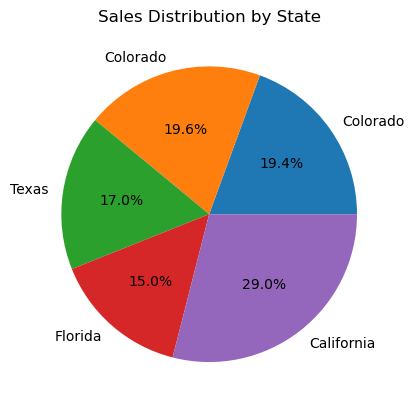

In [207]:
plt.pie(df1['Sales'].head(5), labels=df1['State'].head(5), autopct='%1.1f%%')
plt.title('Sales Distribution by State')  # Optional
plt.show()
# plt.plot(kind = 'pie', x = df1['Sales'], labels = df1['State'])
# plt.show()

In [247]:
# sum across all states
s = df1[['State','Sales']].groupby(['State']).agg(['sum']).sort_values(by=('Sales', 'sum')).reset_index()
s

,State,Sales
,,sum
0,New Hampshire,3543
1,New Mexico,3805
2,Missouri,6072
3,Louisiana,6193
4,Connecticut,6670
5,Oklahoma,7298
6,Massachusetts,7339
7,Wisconsin,7839
8,Ohio,8787


In [ ]:
# sort by date


<function matplotlib.pyplot.show(close=None, block=None)>

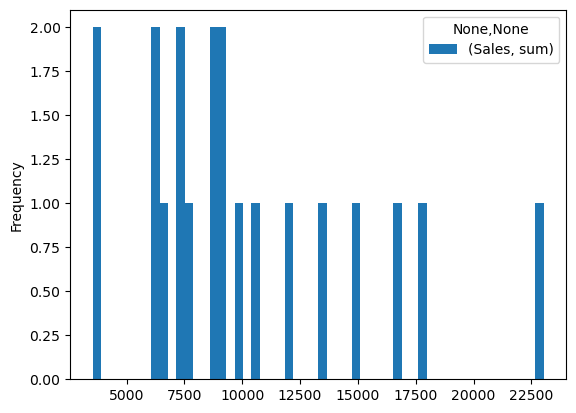

In [243]:
s.plot(kind = 'hist', bins = 54)
plt.show

<Figure size 2000x800 with 0 Axes>

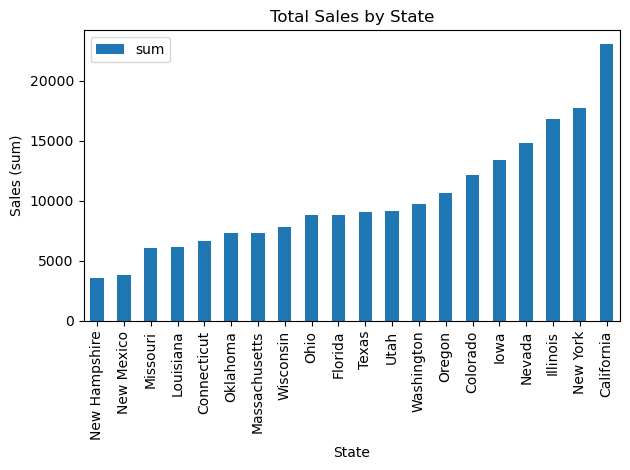

In [265]:
fig = plt.figure(figsize = (20,8))
s.plot(kind = 'bar', x = 'State', y = 'Sales')
plt.xlabel('State')
plt.ylabel('Sales (sum)')
plt.title('Total Sales by State')  # Optional
plt.tight_layout()
plt.show()

In [267]:
df1.head(2)

,Cogs,DifferenceBetweenActualandTargetProfit,Inventory Margin,Margin,Market_size,Market,Marketing,Product_line,Product_type,Product,...,Sales,State,Target_cogs,Target_margin,Target_profit,Target_sales,Total_expenses,Type,Date_date,Area
0,51,-35,503,71,Major Market,Central,46,Leaves,Herbal Tea,Lemon,...,122,Colorado,30,60,30,90,76,Decaf,2012-10-01,303
1,52,-24,405,71,Major Market,Central,17,Leaves,Herbal Tea,Mint,...,123,Colorado,30,60,50,90,45,Decaf,2012-10-01,970


In [301]:
df1[['Sales']].rolling(3).sum()['Sales']

0          NaN
1          NaN
2        352.0
3        324.0
4        383.0
         ...  
1057    1480.0
1058    1384.0
1059     803.0
1060     610.0
1061     422.0
Name: Sales, Length: 1062, dtype: float64

In [321]:
# use RANK() - first sort df
s2 = df1.sort_values(['State', 'Date_date']).reset_index()
s2.head(5)

,index,Cogs,DifferenceBetweenActualandTargetProfit,Inventory Margin,Margin,Market_size,Market,Marketing,Product_line,Product_type,...,Sales,State,Target_cogs,Target_margin,Target_profit,Target_sales,Total_expenses,Type,Date_date,Area
0,4,72,6,650,110,Major Market,West,23,Leaves,Tea,...,182,California,20,60,50,80,54,Regular,2012-10-04,562
1,57,54,3,601,79,Major Market,West,15,Leaves,Tea,...,133,California,30,60,50,90,26,Regular,2012-11-26,619
2,76,72,33,650,110,Major Market,West,23,Leaves,Tea,...,194,California,20,60,50,80,54,Regular,2012-12-15,510
3,129,54,29,601,79,Major Market,West,15,Leaves,Tea,...,142,California,30,60,50,90,26,Regular,2013-02-06,408
4,149,76,29,580,111,Major Market,West,21,Leaves,Tea,...,187,California,30,50,50,80,32,Regular,2013-02-26,209


In [325]:
# using RANK()
s2['rank_num'] = s2.groupby('State')['Sales'].rank()

In [329]:
s2[['Sales', 'rank_num']].head(5)

,Sales,rank_num
0,182,23.0
1,133,16.0
2,194,27.0
3,142,18.0
4,187,24.0


In [335]:
s2[['Sales', 'rank_num']].sort_values('rank_num')

,Sales,rank_num
740,53,1.0
504,21,1.0
637,61,1.0
240,90,1.0
809,53,1.0
...,...,...
48,693,70.0
39,699,71.0
943,246,71.0
66,745,72.0


In [343]:
# s2['Date_date'].strftime('%Y','%M','%D')
s2['year'] = s2['Date_date'].dt.year

In [345]:
s2['month'] = s2['Date_date'].dt.month

In [367]:
s2.head(3)

,index,Cogs,DifferenceBetweenActualandTargetProfit,Inventory Margin,Margin,Market_size,Market,Marketing,Product_line,Product_type,...,Target_margin,Target_profit,Target_sales,Total_expenses,Type,Date_date,Area,rank_num,year,month
0,4,72,6,650,110,Major Market,West,23,Leaves,Tea,...,60,50,80,54,Regular,2012-10-04,562,23.0,2012,10
1,57,54,3,601,79,Major Market,West,15,Leaves,Tea,...,60,50,90,26,Regular,2012-11-26,619,16.0,2012,11
2,76,72,33,650,110,Major Market,West,23,Leaves,Tea,...,60,50,80,54,Regular,2012-12-15,510,27.0,2012,12


In [355]:
# total in month
a = s2[['month','Sales']].groupby('month').sum()['Sales']

In [371]:
# total in month by state
a1 = s2[['State','month','Sales']].groupby(['State','month']).sum()['Sales']

In [391]:
a1.reset_index()

,State,month,Sales
0,California,2,518
1,California,3,4033
2,California,4,3583
3,California,5,3666
4,California,6,3660
...,...,...,...
206,Wisconsin,8,206
207,Wisconsin,9,147
208,Wisconsin,10,724
209,Wisconsin,11,846


In [377]:
a1.head(3)

State       month
California  2         518
            3        4033
            4        3583
Name: Sales, dtype: int64

<Axes: xlabel='month'>

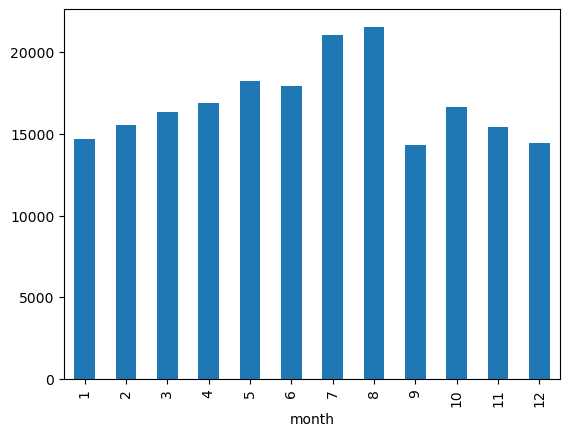

In [357]:
a.plot(kind = 'bar', x = 'month')

In [431]:
a2 = a1.reset_index()

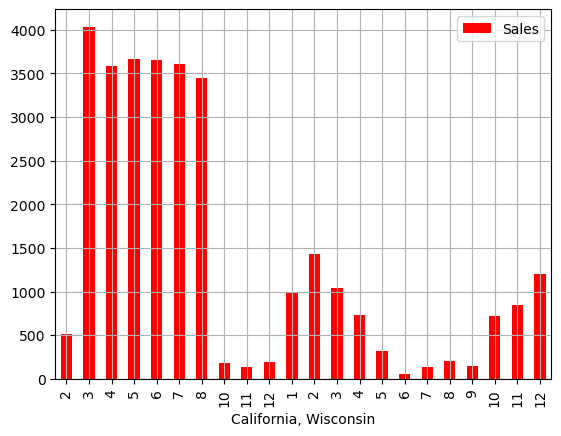

In [457]:
cond = a2['State'].isin(['California', 'Wisconsin']) 
a2[cond].plot(kind = 'bar', x = 'month', y = 'Sales', color = 'red')
plt.xlabel('California, Wisconsin')
plt.grid()

In [463]:
a2.describe()

,month,Sales
count,211.000000,211.000000
mean,6.421801,961.587678
std,3.512874,1052.954105
min,1.000000,52.000000
25%,3.000000,247.000000
50%,6.000000,581.000000
75%,10.000000,1224.000000
max,12.000000,5936.000000


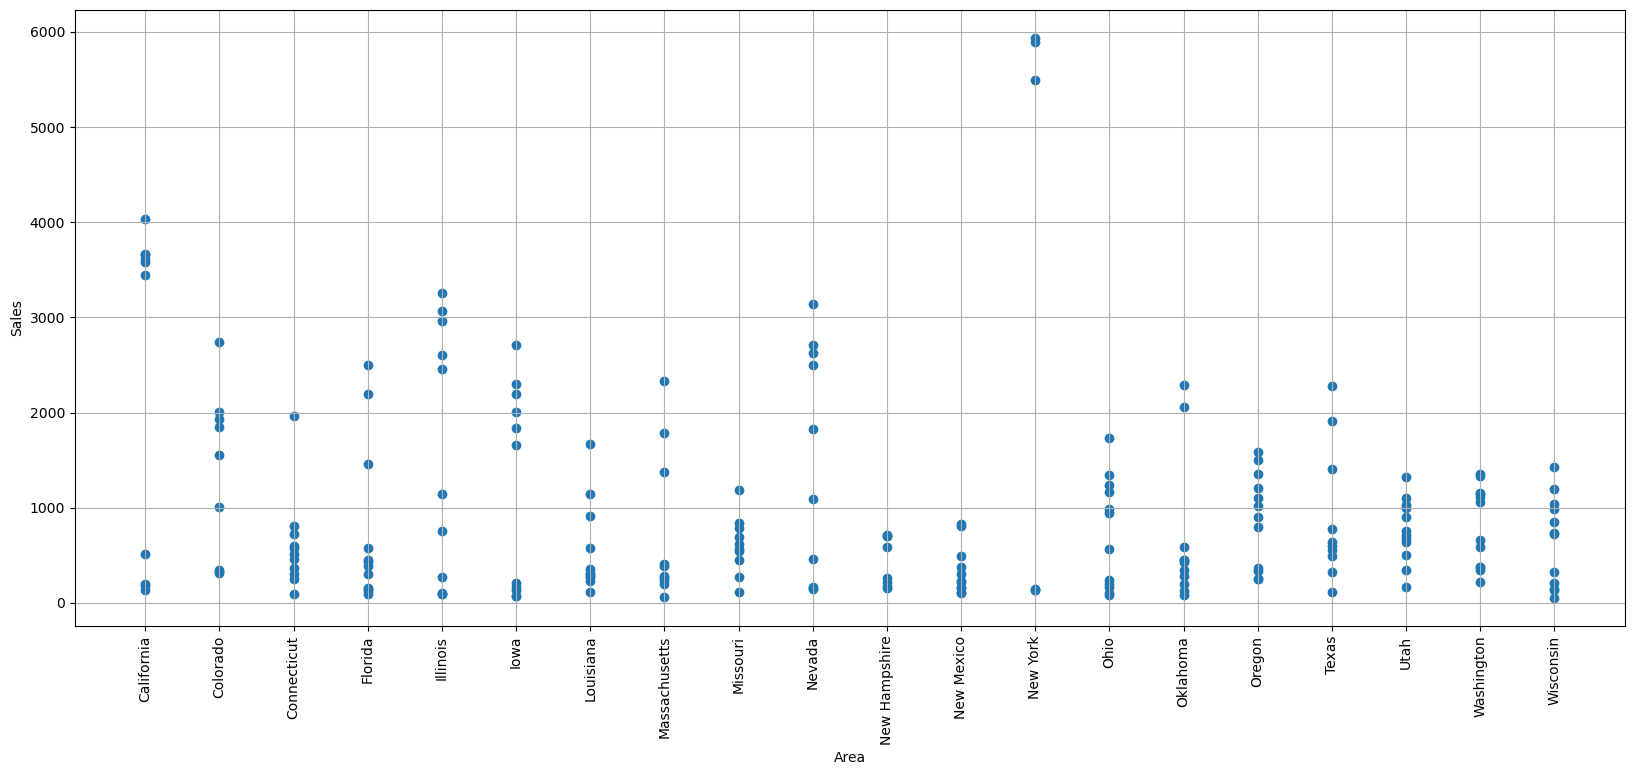

In [465]:
fig = plt.figure(figsize = (20,8))
X = a2['State']
Y = a2['Sales']
plt.scatter(X,Y)
plt.xlabel('Area')
plt.ylabel('Sales')
plt.xticks(rotation = 90)
plt.grid()
plt.show()

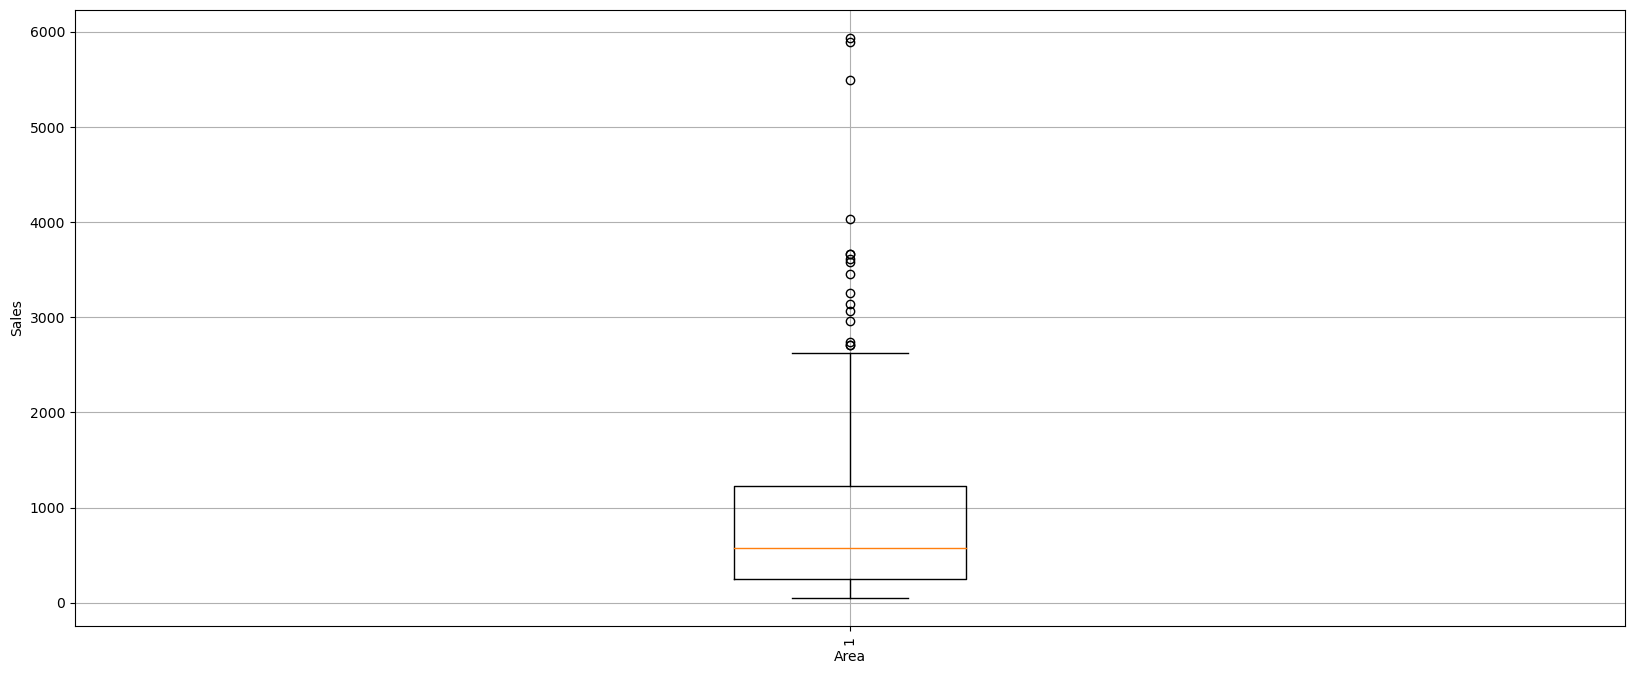

In [475]:
fig = plt.figure(figsize = (20,8))
X = a2['State']
Y = a2['Sales']
plt.boxplot( Y)
plt.xlabel('Area')
plt.ylabel('Sales')
plt.xticks(rotation = 90)
plt.grid()
plt.show()

In [495]:
a2.dtypes

State    object
month     int32
Sales     int64
dtype: object

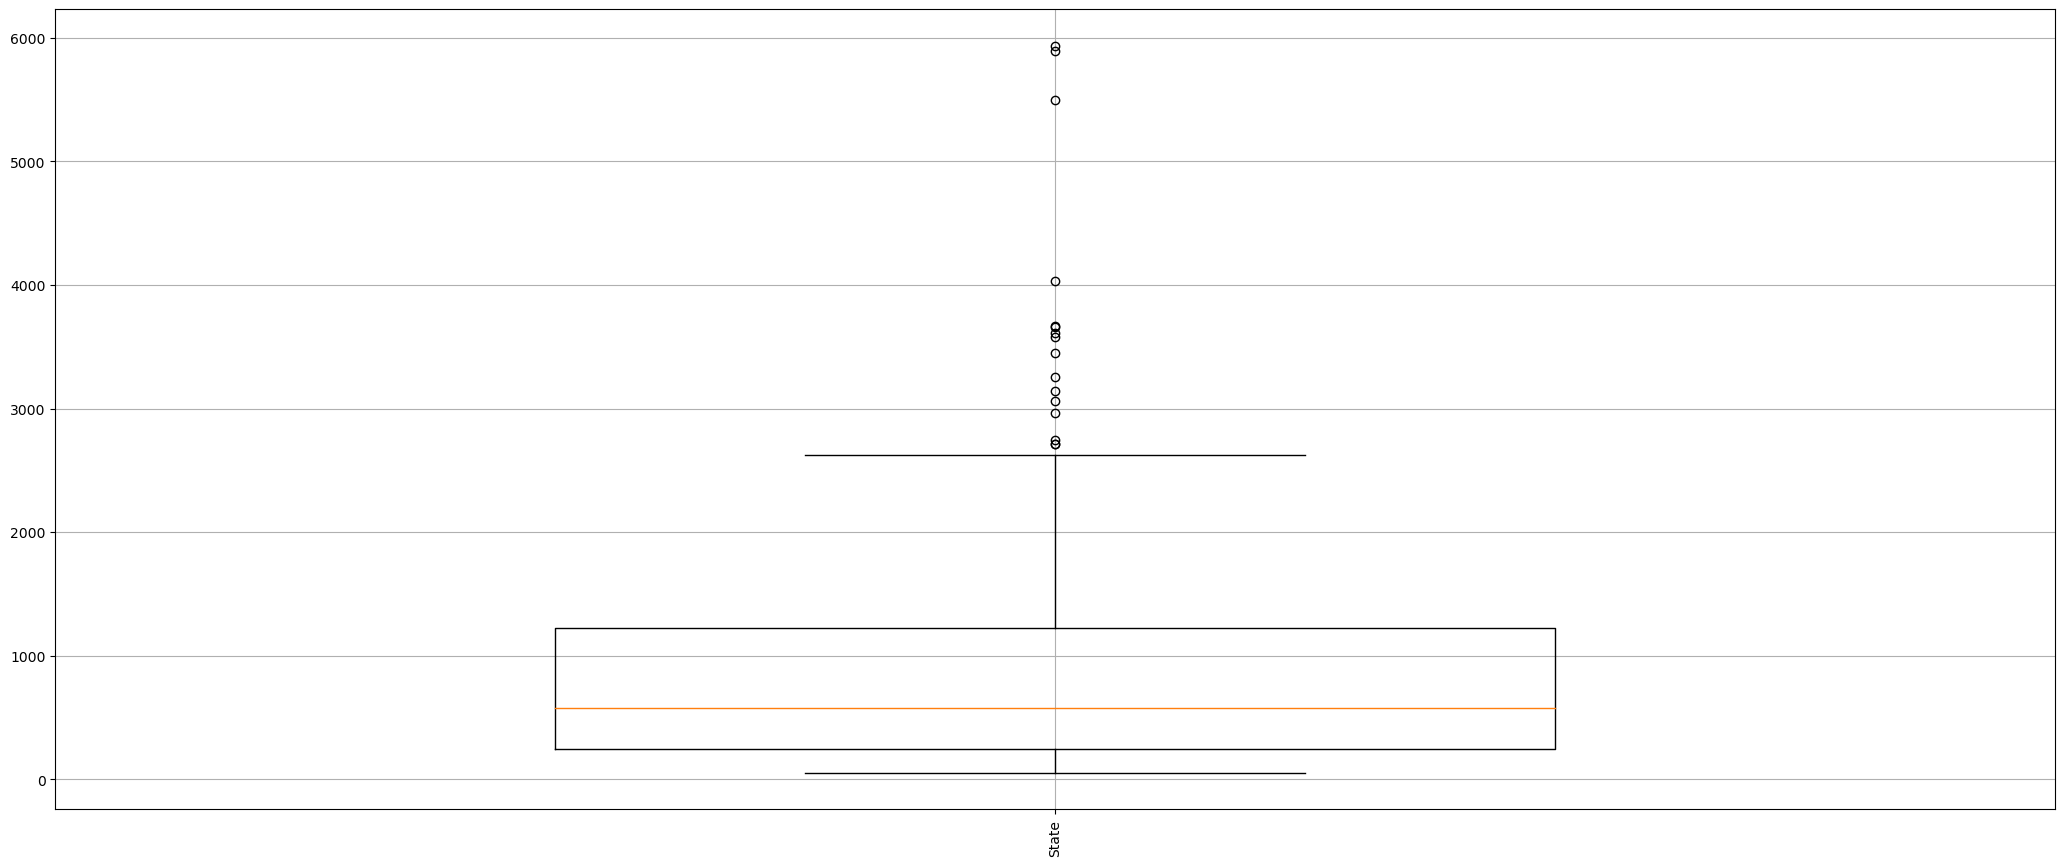

In [497]:
fig = plt.figure(figsize = (20,8))
ax = fig.add_axes([0,0,1,1])
data = []
for column in a2.select_dtypes(include='int64').columns:
    data.append(a2.select_dtypes(include='int64')[column])
labels = a2.select_dtypes(include='object').columns
# labels = a2['State']
box_plot = ax.boxplot(data,  widths =0.5)
ax.set_xticklabels(labels)
plt.xticks(rotation = 90)
# plt.ylim(-7,7)
plt.grid()
plt.show()

In [505]:
df['State'].value_counts()

State
California       72
Utah             72
Colorado         66
Nevada           66
Oregon           66
Washington       60
Missouri         54
Florida          54
Iowa             54
Ohio             54
Illinois         54
Wisconsin        54
New York         48
Texas            42
New Hampshire    42
Oklahoma         42
New Mexico       42
Connecticut      42
Louisiana        42
Massachusetts    36
Name: count, dtype: int64

In [507]:
df.columns

Index(['Area Code', 'Cogs', 'DifferenceBetweenActualandTargetProfit', 'Date',
       'Inventory Margin', 'Margin', 'Market_size', 'Market', 'Marketing',
       'Product_line', 'Product_type', 'Product', 'Profit', 'Sales', 'State',
       'Target_cogs', 'Target_margin', 'Target_profit', 'Target_sales ',
       'Total_expenses', 'Type', 'Date_date', 'Area'],
      dtype='object')

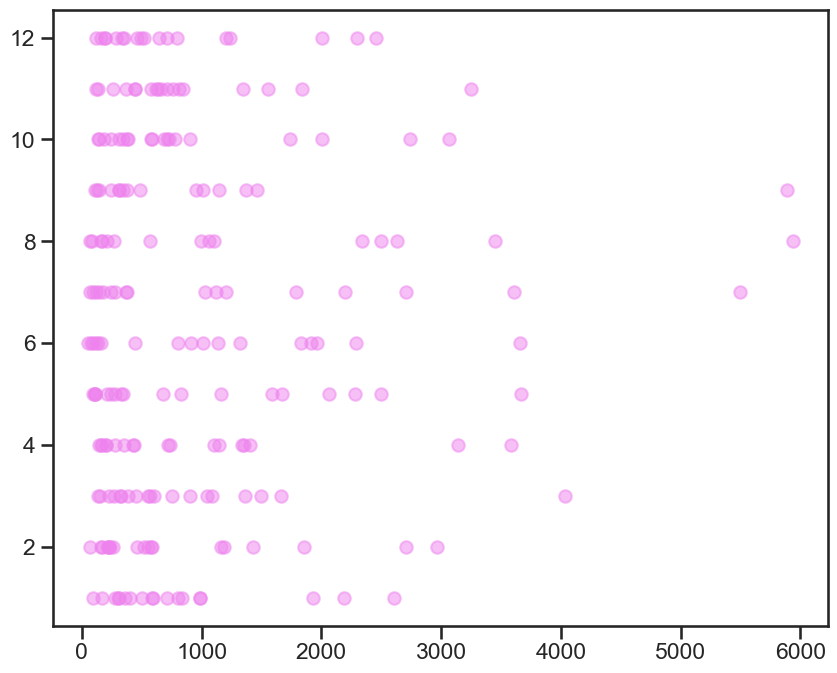

In [515]:
plt.figure(figsize=(10,8))
sns.set_context('talk')
sns.set_style('ticks')
sns.set_palette('dark')
ax = plt.axes()
ax.scatter(a2['Sales'], a2['month'] , alpha=.5,color='violet')
plt.show()

In [517]:
df.head(2)

,Area Code,Cogs,DifferenceBetweenActualandTargetProfit,Date,Inventory Margin,Margin,Market_size,Market,Marketing,Product_line,...,Sales,State,Target_cogs,Target_margin,Target_profit,Target_sales,Total_expenses,Type,Date_date,Area
0,303,51,-35,10/1/2012,503,71,Major Market,Central,46,Leaves,...,122,Colorado,30,60,30,90,76,Decaf,2012-10-01,303
1,970,52,-24,10/1/2012,405,71,Major Market,Central,17,Leaves,...,123,Colorado,30,60,50,90,45,Decaf,2012-10-01,970


In [523]:
df = df.rename(columns = {'DifferenceBetweenActualandTargetProfit' : 'Delta'})

In [525]:
df.head(2)

,Area Code,Cogs,Delta,Date,Inventory Margin,Margin,Market_size,Market,Marketing,Product_line,...,Sales,State,Target_cogs,Target_margin,Target_profit,Target_sales,Total_expenses,Type,Date_date,Area
0,303,51,-35,10/1/2012,503,71,Major Market,Central,46,Leaves,...,122,Colorado,30,60,30,90,76,Decaf,2012-10-01,303
1,970,52,-24,10/1/2012,405,71,Major Market,Central,17,Leaves,...,123,Colorado,30,60,50,90,45,Decaf,2012-10-01,970


In [527]:
df.max()

Area Code                           985
Cogs                                294
Delta                               249
Date                           9/9/2014
Inventory Margin                   8252
Margin                              526
Market_size                Small Market
Market                             West
Marketing                           122
Product_line                     Leaves
Product_type                        Tea
Product                Regular Espresso
Profit                              646
Sales                               815
State                         Wisconsin
Target_cogs                         380
Target_margin                       580
Target_profit                       470
Target_sales                        960
Total_expenses                      156
Type                            Regular
Date_date           2015-08-27 00:00:00
Area                                985
dtype: object

In [533]:
df['State'].unique()

array(['Colorado', 'Texas', 'Florida', 'California', 'Iowa',
       'Connecticut', 'Oklahoma', 'Nevada', 'Utah', 'New Hampshire',
       'Louisiana', 'Oregon', 'Missouri', 'Wisconsin', 'Washington',
       'Massachusetts', 'Illinois', 'New Mexico', 'Ohio', 'New York'],
      dtype=object)

In [537]:
df['Delta'].nunique()

200

In [545]:
df['Sales'].median()

133.0

In [551]:
'All right and oppa'.split()

['All', 'right', 'and', 'oppa']

In [559]:
df_x = df.rename(columns = lambda x: x.upper())

In [561]:
df_x.head(2)

,AREA CODE,COGS,DELTA,DATE,INVENTORY MARGIN,MARGIN,MARKET_SIZE,MARKET,MARKETING,PRODUCT_LINE,...,SALES,STATE,TARGET_COGS,TARGET_MARGIN,TARGET_PROFIT,TARGET_SALES,TOTAL_EXPENSES,TYPE,DATE_DATE,AREA
0,303,51,-35,10/1/2012,503,71,Major Market,Central,46,Leaves,...,122,Colorado,30,60,30,90,76,Decaf,2012-10-01,303
1,970,52,-24,10/1/2012,405,71,Major Market,Central,17,Leaves,...,123,Colorado,30,60,50,90,45,Decaf,2012-10-01,970


In [571]:
df_x = df_x.rename(columns = lambda x: x.lower())

In [573]:
df_x.head(2)

,area code,cogs,delta,date,inventory margin,margin,market_size,market,marketing,product_line,...,sales,state,target_cogs,target_margin,target_profit,target_sales,total_expenses,type,date_date,area
0,303,51,-35,10/1/2012,503,71,Major Market,Central,46,Leaves,...,122,Colorado,30,60,30,90,76,Decaf,2012-10-01,303
1,970,52,-24,10/1/2012,405,71,Major Market,Central,17,Leaves,...,123,Colorado,30,60,50,90,45,Decaf,2012-10-01,970


In [579]:
# df_x['Market_size'].apply(lambda = x: x.upper())
df_x['market_size'] = df_x['market_size'].apply(lambda x: x.upper())

In [581]:
df_x.head(2)

,area code,cogs,delta,date,inventory margin,margin,market_size,market,marketing,product_line,...,sales,state,target_cogs,target_margin,target_profit,target_sales,total_expenses,type,date_date,area
0,303,51,-35,10/1/2012,503,71,MAJOR MARKET,Central,46,Leaves,...,122,Colorado,30,60,30,90,76,Decaf,2012-10-01,303
1,970,52,-24,10/1/2012,405,71,MAJOR MARKET,Central,17,Leaves,...,123,Colorado,30,60,50,90,45,Decaf,2012-10-01,970


In [583]:
df_x['marketing'] = df_x['marketing'].apply(lambda x: x*100)

In [585]:
df_x.head(3)

,area code,cogs,delta,date,inventory margin,margin,market_size,market,marketing,product_line,...,sales,state,target_cogs,target_margin,target_profit,target_sales,total_expenses,type,date_date,area
0,303,51,-35,10/1/2012,503,71,MAJOR MARKET,Central,4600,Leaves,...,122,Colorado,30,60,30,90,76,Decaf,2012-10-01,303
1,970,52,-24,10/1/2012,405,71,MAJOR MARKET,Central,1700,Leaves,...,123,Colorado,30,60,50,90,45,Decaf,2012-10-01,970
2,409,43,-22,10/2/2012,419,64,MAJOR MARKET,South,1300,Leaves,...,107,Texas,30,60,50,90,36,Decaf,2012-10-02,409


In [591]:
df.index

RangeIndex(start=0, stop=1062, step=1)

In [593]:
df.columns

Index(['Area Code', 'Cogs', 'Delta', 'Date', 'Inventory Margin', 'Margin',
       'Market_size', 'Market', 'Marketing', 'Product_line', 'Product_type',
       'Product', 'Profit', 'Sales', 'State', 'Target_cogs', 'Target_margin',
       'Target_profit', 'Target_sales ', 'Total_expenses', 'Type', 'Date_date',
       'Area'],
      dtype='object')

In [597]:
df.sort_values('State').reset_index()

,index,Area Code,Cogs,Delta,Date,Inventory Margin,Margin,Market_size,Market,Marketing,...,Sales,State,Target_cogs,Target_margin,Target_profit,Target_sales,Total_expenses,Type,Date_date,Area
0,949,707,279,-79,5/7/2015,2642,420,Major Market,West,97,...,699,California,330,500,350,830,149,Regular,2015-05-07,707
1,982,831,123,119,6/9/2015,915,179,Major Market,West,34,...,322,California,50,90,80,140,45,Regular,2015-06-09,831
2,981,951,239,106,6/8/2015,1246,281,Major Market,West,74,...,554,California,190,220,170,410,95,Decaf,2015-06-08,951
3,1042,323,123,89,8/8/2015,959,179,Major Market,West,34,...,322,California,90,130,110,220,45,Regular,2015-08-08,323
4,980,925,108,51,6/7/2015,971,157,Major Market,West,30,...,282,California,80,130,120,210,42,Decaf,2015-06-07,925
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1057,155,715,60,0,3/4/2013,606,84,Small Market,Central,54,...,144,Wisconsin,40,50,0,90,84,Regular,2013-03-04,715
1058,154,262,46,-10,3/3/2013,449,67,Small Market,Central,14,...,113,Wisconsin,20,50,40,70,37,Regular,2013-03-03,262
1059,150,715,22,-40,2/27/2013,573,29,Small Market,Central,7,...,51,Wisconsin,20,50,50,70,19,Decaf,2013-02-27,715
1060,205,262,60,0,4/23/2013,606,84,Small Market,Central,54,...,153,Wisconsin,40,50,0,90,84,Regular,2013-04-23,262


In [599]:
df.head(5)

,Area Code,Cogs,Delta,Date,Inventory Margin,Margin,Market_size,Market,Marketing,Product_line,...,Sales,State,Target_cogs,Target_margin,Target_profit,Target_sales,Total_expenses,Type,Date_date,Area
0,303,51,-35,10/1/2012,503,71,Major Market,Central,46,Leaves,...,122,Colorado,30,60,30,90,76,Decaf,2012-10-01,303
1,970,52,-24,10/1/2012,405,71,Major Market,Central,17,Leaves,...,123,Colorado,30,60,50,90,45,Decaf,2012-10-01,970
2,409,43,-22,10/2/2012,419,64,Major Market,South,13,Leaves,...,107,Texas,30,60,50,90,36,Decaf,2012-10-02,409
3,850,38,-15,10/3/2012,871,56,Major Market,East,10,Leaves,...,94,Florida,40,60,50,100,21,Regular,2012-10-03,850
4,562,72,6,10/4/2012,650,110,Major Market,West,23,Leaves,...,182,California,20,60,50,80,54,Regular,2012-10-04,562


In [601]:
df_x = df.sort_values('State')

In [603]:
df_x.head(5)

,Area Code,Cogs,Delta,Date,Inventory Margin,Margin,Market_size,Market,Marketing,Product_line,...,Sales,State,Target_cogs,Target_margin,Target_profit,Target_sales,Total_expenses,Type,Date_date,Area
949,707,279,-79,5/7/2015,2642,420,Major Market,West,97,Beans,...,699,California,330,500,350,830,149,Regular,2015-05-07,707
982,831,123,119,6/9/2015,915,179,Major Market,West,34,Leaves,...,322,California,50,90,80,140,45,Regular,2015-06-09,831
981,951,239,106,6/8/2015,1246,281,Major Market,West,74,Leaves,...,554,California,190,220,170,410,95,Decaf,2015-06-08,951
1042,323,123,89,8/8/2015,959,179,Major Market,West,34,Leaves,...,322,California,90,130,110,220,45,Regular,2015-08-08,323
980,925,108,51,6/7/2015,971,157,Major Market,West,30,Leaves,...,282,California,80,130,120,210,42,Decaf,2015-06-07,925


In [605]:
df_x.reset_index(drop=True)

,Area Code,Cogs,Delta,Date,Inventory Margin,Margin,Market_size,Market,Marketing,Product_line,...,Sales,State,Target_cogs,Target_margin,Target_profit,Target_sales,Total_expenses,Type,Date_date,Area
0,707,279,-79,5/7/2015,2642,420,Major Market,West,97,Beans,...,699,California,330,500,350,830,149,Regular,2015-05-07,707
1,831,123,119,6/9/2015,915,179,Major Market,West,34,Leaves,...,322,California,50,90,80,140,45,Regular,2015-06-09,831
2,951,239,106,6/8/2015,1246,281,Major Market,West,74,Leaves,...,554,California,190,220,170,410,95,Decaf,2015-06-08,951
3,323,123,89,8/8/2015,959,179,Major Market,West,34,Leaves,...,322,California,90,130,110,220,45,Regular,2015-08-08,323
4,925,108,51,6/7/2015,971,157,Major Market,West,30,Leaves,...,282,California,80,130,120,210,42,Decaf,2015-06-07,925
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1057,715,60,0,3/4/2013,606,84,Small Market,Central,54,Leaves,...,144,Wisconsin,40,50,0,90,84,Regular,2013-03-04,715
1058,262,46,-10,3/3/2013,449,67,Small Market,Central,14,Leaves,...,113,Wisconsin,20,50,40,70,37,Regular,2013-03-03,262
1059,715,22,-40,2/27/2013,573,29,Small Market,Central,7,Beans,...,51,Wisconsin,20,50,50,70,19,Decaf,2013-02-27,715
1060,262,60,0,4/23/2013,606,84,Small Market,Central,54,Leaves,...,153,Wisconsin,40,50,0,90,84,Regular,2013-04-23,262


In [607]:
df_x.head(5)

,Area Code,Cogs,Delta,Date,Inventory Margin,Margin,Market_size,Market,Marketing,Product_line,...,Sales,State,Target_cogs,Target_margin,Target_profit,Target_sales,Total_expenses,Type,Date_date,Area
949,707,279,-79,5/7/2015,2642,420,Major Market,West,97,Beans,...,699,California,330,500,350,830,149,Regular,2015-05-07,707
982,831,123,119,6/9/2015,915,179,Major Market,West,34,Leaves,...,322,California,50,90,80,140,45,Regular,2015-06-09,831
981,951,239,106,6/8/2015,1246,281,Major Market,West,74,Leaves,...,554,California,190,220,170,410,95,Decaf,2015-06-08,951
1042,323,123,89,8/8/2015,959,179,Major Market,West,34,Leaves,...,322,California,90,130,110,220,45,Regular,2015-08-08,323
980,925,108,51,6/7/2015,971,157,Major Market,West,30,Leaves,...,282,California,80,130,120,210,42,Decaf,2015-06-07,925


<Axes: ylabel='Frequency'>

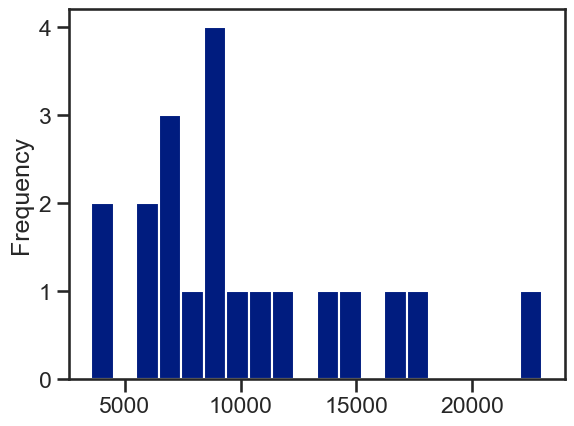

In [613]:
df[['State','Sales']].groupby(['State']).sum()['Sales'].plot.hist(bins = 20)

C:\Users\teren\AppData\Local\Temp\ipykernel_20904\3884211645.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[['State','Sales']].groupby(['State']).sum()['Sales'])
C:\Users\teren\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


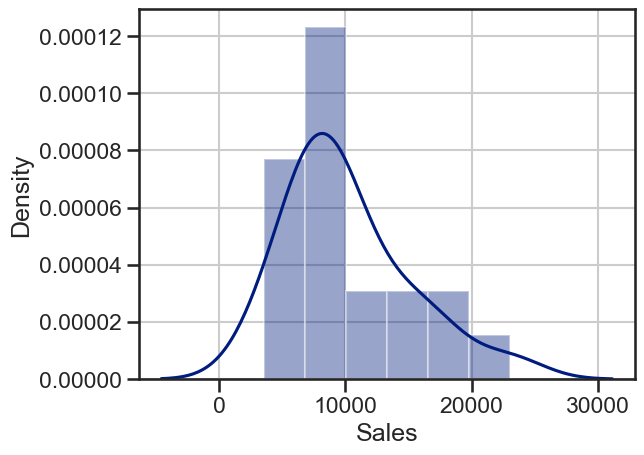

In [625]:
sns.distplot(df[['State','Sales']].groupby(['State']).sum()['Sales'])
plt.grid()

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19]),
 [Text(0, 0, 'Colorado'),
  Text(1, 0, 'Texas'),
  Text(2, 0, 'Florida'),
  Text(3, 0, 'California'),
  Text(4, 0, 'Iowa'),
  Text(5, 0, 'Connecticut'),
  Text(6, 0, 'Oklahoma'),
  Text(7, 0, 'Nevada'),
  Text(8, 0, 'Utah'),
  Text(9, 0, 'New Hampshire'),
  Text(10, 0, 'Louisiana'),
  Text(11, 0, 'Oregon'),
  Text(12, 0, 'Missouri'),
  Text(13, 0, 'Wisconsin'),
  Text(14, 0, 'Washington'),
  Text(15, 0, 'Massachusetts'),
  Text(16, 0, 'Illinois'),
  Text(17, 0, 'New Mexico'),
  Text(18, 0, 'Ohio'),
  Text(19, 0, 'New York')])

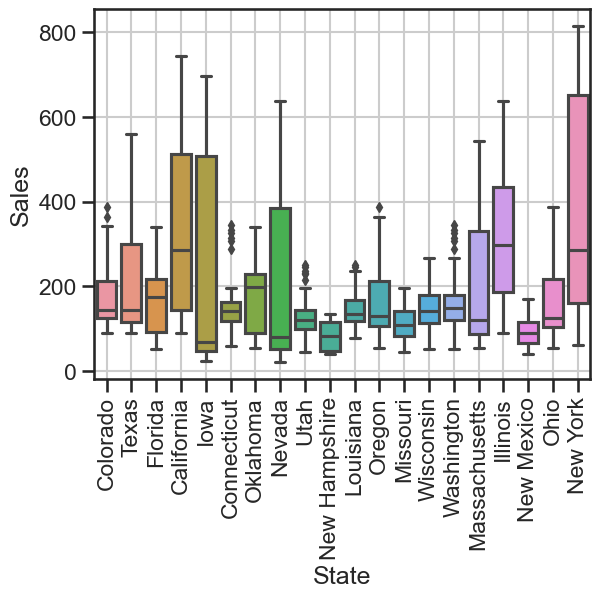

In [629]:
sns.boxplot(data = df, x = 'State', y = 'Sales')
plt.grid()
plt.xticks(rotation = 90)

(array([0]), [Text(0, 0, 'Utah')])

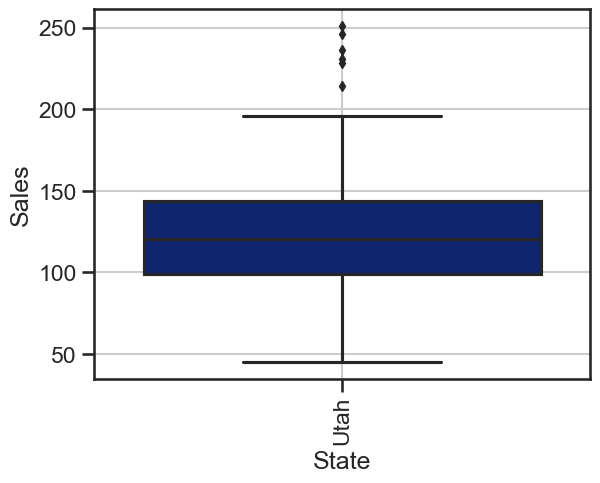

In [631]:
sns.boxplot(data = df[df['State'] == 'Utah'], x = 'State', y = 'Sales')
plt.grid()
plt.xticks(rotation = 90)

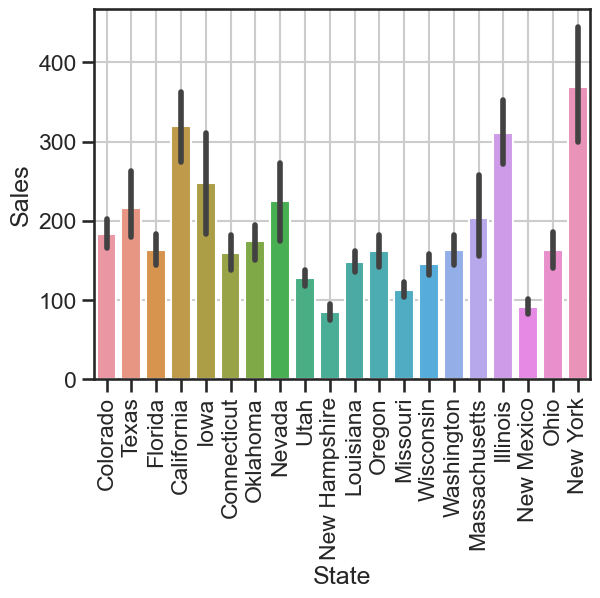

In [637]:
sns.barplot(x = 'State', y = 'Sales', data = df)
plt.grid()
plt.xticks(rotation = 90)
plt.savefig('111.jpg')

In [641]:
df.describe()

,Area Code,Cogs,Delta,Inventory Margin,Margin,Marketing,Profit,Sales,Target_cogs,Target_margin,Target_profit,Target_sales,Total_expenses,Date_date
count,1062.000000,1062.000000,1062.000000,1062.000000,1062.000000,1062.000000,1062.000000,1062.000000,1062.000000,1062.000000,1062.000000,1062.000000,1062.000000,1062
mean,587.030132,82.399247,0.387006,815.175141,102.423729,30.433145,60.556497,191.049906,71.676083,96.817326,60.169492,168.493409,53.836158,2014-03-14 12:01:21.355932416
min,203.000000,0.000000,-369.000000,-3534.000000,-294.000000,0.000000,-605.000000,21.000000,0.000000,-210.000000,-320.000000,0.000000,11.000000,2012-10-01 00:00:00
25%,425.000000,41.000000,-15.000000,447.000000,51.000000,13.000000,16.250000,98.000000,30.000000,50.000000,20.000000,80.000000,33.000000,2013-06-22 06:00:00
50%,573.000000,57.000000,-3.000000,659.000000,73.000000,22.000000,39.500000,133.000000,50.000000,70.000000,40.000000,120.000000,46.000000,2014-03-14 12:00:00
75%,774.000000,101.000000,13.000000,968.000000,130.000000,40.750000,87.000000,227.000000,90.000000,120.000000,80.000000,210.000000,66.000000,2014-12-04 18:00:00
max,985.000000,294.000000,249.000000,8252.000000,526.000000,122.000000,646.000000,815.000000,380.000000,580.000000,470.000000,960.000000,156.000000,2015-08-27 00:00:00
std,225.299162,64.824295,44.331180,916.156386,91.286704,25.963448,100.516593,148.270317,65.701583,89.467176,77.824869,145.955171,31.703526,NaN


In [643]:
df.head(2)

,Area Code,Cogs,Delta,Date,Inventory Margin,Margin,Market_size,Market,Marketing,Product_line,...,Sales,State,Target_cogs,Target_margin,Target_profit,Target_sales,Total_expenses,Type,Date_date,Area
0,303,51,-35,10/1/2012,503,71,Major Market,Central,46,Leaves,...,122,Colorado,30,60,30,90,76,Decaf,2012-10-01,303
1,970,52,-24,10/1/2012,405,71,Major Market,Central,17,Leaves,...,123,Colorado,30,60,50,90,45,Decaf,2012-10-01,970


In [645]:
df['Target_cogs'] = df['Target_cogs'].astype('object')

In [649]:
df.dtypes

Area Code                    int64
Cogs                         int64
Delta                        int64
Date                        object
Inventory Margin             int64
Margin                       int64
Market_size                 object
Market                      object
Marketing                    int64
Product_line                object
Product_type                object
Product                     object
Profit                       int64
Sales                        int64
State                       object
Target_cogs                 object
Target_margin                int64
Target_profit                int64
Target_sales                 int64
Total_expenses               int64
Type                        object
Date_date           datetime64[ns]
Area                        object
dtype: object

In [653]:
df.loc[df.duplicated(subset = ['State', 'Type'])]

,Area Code,Cogs,Delta,Date,Inventory Margin,Margin,Market_size,Market,Marketing,Product_line,...,Sales,State,Target_cogs,Target_margin,Target_profit,Target_sales,Total_expenses,Type,Date_date,Area
1,970,52,-24,10/1/2012,405,71,Major Market,Central,17,Leaves,...,123,Colorado,30,60,50,90,45,Decaf,2012-10-01,970
11,603,45,-26,10/11/2012,447,69,Small Market,East,14,Beans,...,114,New Hampshire,30,60,50,90,45,Regular,2012-10-11,603
12,603,45,-37,10/12/2012,320,64,Small Market,East,41,Beans,...,109,New Hampshire,30,60,30,90,71,Regular,2012-10-12,603
18,801,49,-27,10/18/2012,310,71,Small Market,West,15,Leaves,...,120,Utah,30,60,60,90,38,Decaf,2012-10-18,801
21,971,82,14,10/21/2012,788,123,Small Market,West,27,Leaves,...,205,Oregon,30,60,50,90,59,Regular,2012-10-21,971
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1057,775,250,133,8/23/2015,1820,251,Small Market,West,70,Leaves,...,534,Nevada,180,180,100,360,94,Regular,2015-08-23,775
1058,971,88,48,8/24/2015,817,133,Small Market,West,29,Leaves,...,236,Oregon,60,100,60,160,60,Regular,2015-08-24,971
1059,775,294,-285,8/25/2015,8252,-294,Small Market,West,111,Leaves,...,33,Nevada,210,-210,-320,0,145,Regular,2015-08-25,775
1060,503,134,80,8/26/2015,690,186,Small Market,West,41,Leaves,...,341,Oregon,90,140,100,230,65,Regular,2015-08-26,503


C:\Users\teren\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\teren\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='Date_date', ylabel='Sales'>

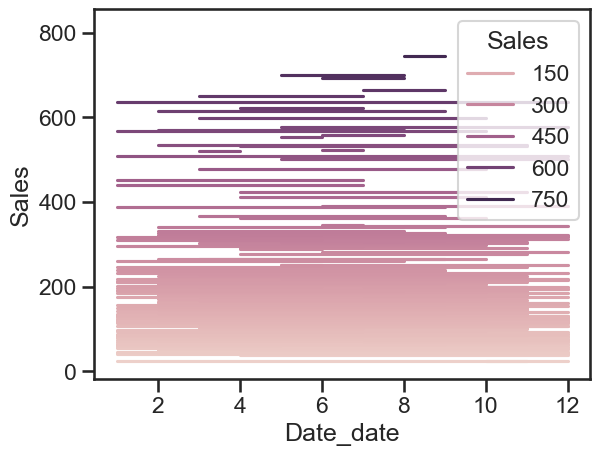

In [655]:
sns.lineplot(x = df['Date_date'].dt.month, y = 'Sales', data = df, hue = 'Sales')

C:\Users\teren\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\teren\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='Date_date', ylabel='Sales'>

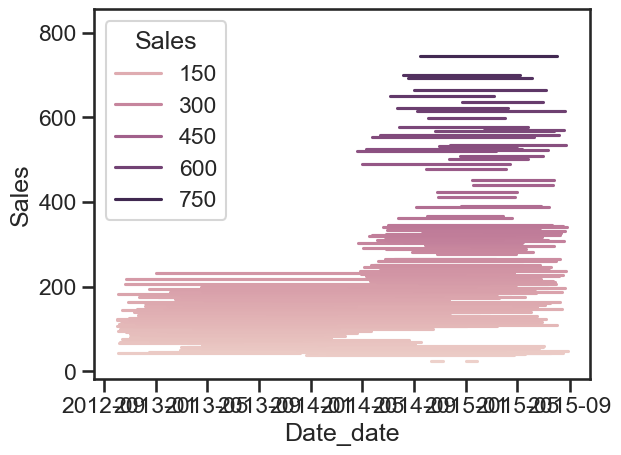

In [657]:
sns.lineplot(x = 'Date_date', y = 'Sales', data = df, hue = 'Sales')

<Axes: >

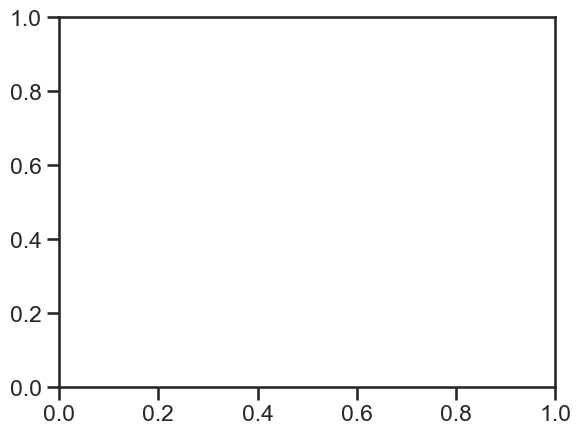

In [671]:
sns.lineplot(x = 'Date_date', y = 'Sales', data = df[df['Area Code'] == '603'], hue = 'Sales')

In [673]:
df.head(3)

,Area Code,Cogs,Delta,Date,Inventory Margin,Margin,Market_size,Market,Marketing,Product_line,...,Sales,State,Target_cogs,Target_margin,Target_profit,Target_sales,Total_expenses,Type,Date_date,Area
0,303,51,-35,10/1/2012,503,71,Major Market,Central,46,Leaves,...,122,Colorado,30,60,30,90,76,Decaf,2012-10-01,303
1,970,52,-24,10/1/2012,405,71,Major Market,Central,17,Leaves,...,123,Colorado,30,60,50,90,45,Decaf,2012-10-01,970
2,409,43,-22,10/2/2012,419,64,Major Market,South,13,Leaves,...,107,Texas,30,60,50,90,36,Decaf,2012-10-02,409


In [677]:
df[['Type', 'Sales']].groupby(['Type']).agg(['sum','median','mean','count'])

Sales                         
            sum median        mean count
Type                                    
Decaf     85404  136.5  184.857143   462
Regular  117491  132.0  195.818333   600

In [679]:
df['Month'] = df['Date_date'].dt.month
# df[['Type', 'Sales']].groupby(['Type']).agg(['sum','median','mean','count'])

In [681]:
df.head(3)

,Area Code,Cogs,Delta,Date,Inventory Margin,Margin,Market_size,Market,Marketing,Product_line,...,State,Target_cogs,Target_margin,Target_profit,Target_sales,Total_expenses,Type,Date_date,Area,Month
0,303,51,-35,10/1/2012,503,71,Major Market,Central,46,Leaves,...,Colorado,30,60,30,90,76,Decaf,2012-10-01,303,10
1,970,52,-24,10/1/2012,405,71,Major Market,Central,17,Leaves,...,Colorado,30,60,50,90,45,Decaf,2012-10-01,970,10
2,409,43,-22,10/2/2012,419,64,Major Market,South,13,Leaves,...,Texas,30,60,50,90,36,Decaf,2012-10-02,409,10


In [689]:
req = df[['Type', 'Month', 'Sales']].groupby(['Type', 'Month']).agg(['sum','median','mean','count']).reset_index()

In [691]:
req.head(3)

Type Month Sales                         
                 sum median        mean count
0  Decaf     1  6209  119.0  151.439024    41
1  Decaf     2  7679  152.5  182.833333    42
2  Decaf     3  7611  150.0  185.634146    41

In [703]:
req.columns

MultiIndex([( 'Type',       ''),
            ('Month',       ''),
            ('Sales',    'sum'),
            ('Sales', 'median'),
            ('Sales',   'mean'),
            ('Sales',  'count')],
           )

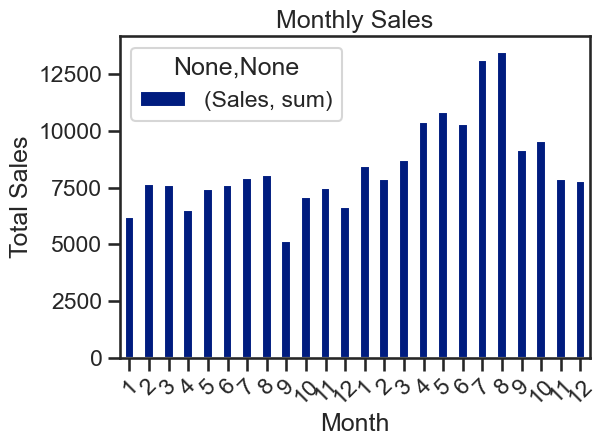

In [705]:
req.plot(kind = 'bar', x = 'Month', y = ('Sales',    'sum'))
plt.xlabel('Month')
plt.ylabel('Total Sales')
plt.title('Monthly Sales')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

<Axes: >

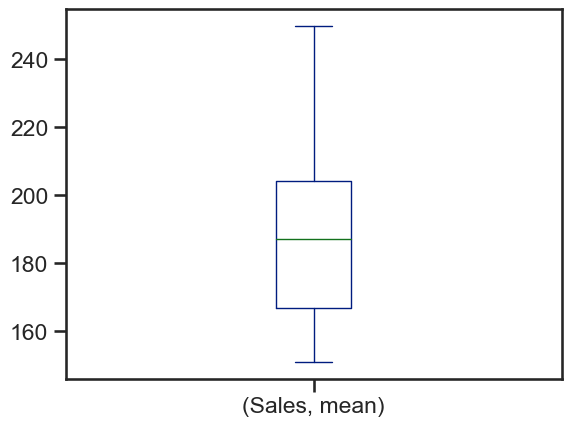

In [735]:
req.plot(kind = 'box', y = ('Sales', 'mean'), x = 'Type')

<Axes: xlabel='Month', ylabel='(Sales, sum)'>

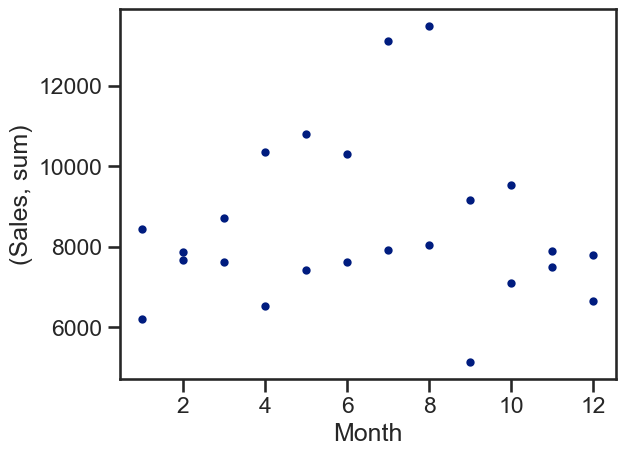

In [737]:
req.plot(kind = 'scatter', x = 'Month', y = ('Sales','sum'))

In [751]:
req = req.rename(columns = {"('Sales','sum')" : 'Sum_sal'})

In [757]:
req.columns

Index(['Type', 'Month', 'Sales_sum', 'Sales_median', 'Sales_mean',
       'Sales_count'],
      dtype='object')

In [755]:
req.columns = ['_'.join(filter(None, col)).strip() for col in req.columns]

In [759]:
x = req['Month']
y = req['Sales_sum']

In [761]:
m = sps.linregress(x,y)

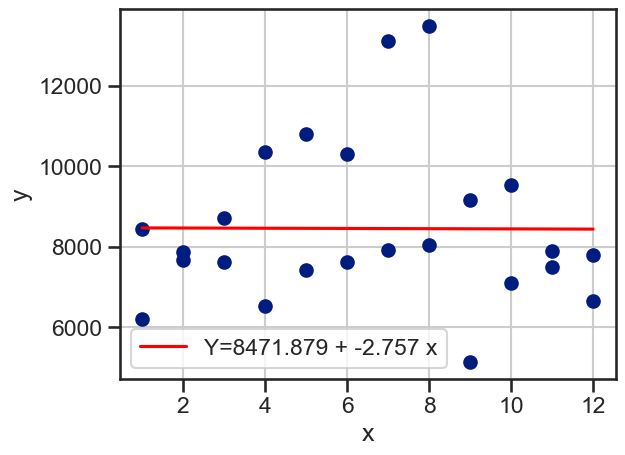

2.364525008961469e-05


In [791]:
x0 = np.array([x.min(), x.max()])
y0 = m.intercept + m.slope * x0
plt.scatter(x,y)
# req.plot(kind = 'scatter', x = x, y = y, color = 'green')
plt.plot(x0,y0,color = 'red', label = f'Y={round(m.intercept, 3)} + {round(m.slope,3)} x')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.grid()
plt.show()
print((m.rvalue)**2)

In [815]:
x = req['Sales_count']
y = req['Sales_sum']

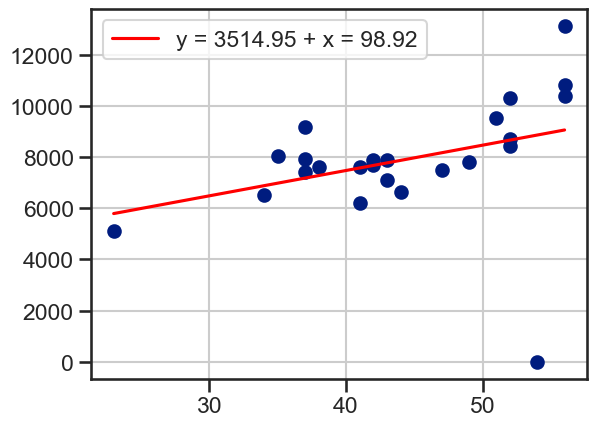

0.12283607033307004


In [817]:
m = sps.linregress(x,y)
x0 = np.array([x.min(), x.max()])
y0 = m.intercept + m.slope * x0
plt.scatter(x,y)
plt.plot(x0,y0, color = 'red', label = f'y = {round(m.intercept,2)} + x = {round(m.slope,2)}')
plt.legend()
plt.grid()
plt.show()
print((m.rvalue)**2)

In [801]:
print(y0)

[ 4646.77474316 10559.10690672]


In [805]:
print(x0)

[23 56]


In [807]:
req['Sales_sum'].describe()

count       24.000000
mean      8453.958333
std       1999.322287
min       5126.000000
25%       7482.500000
50%       7882.000000
75%       9251.250000
max      13485.000000
Name: Sales_sum, dtype: float64

In [813]:
req [req['Sales_sum'] == req['Sales_sum'].max()]

,Type,Month,Sales_sum,Sales_median,Sales_mean,Sales_count
18,Regular,7,13121,176.5,234.303571,56


In [811]:
req.loc[(19,'Sales_sum')] = 0